# Neural Networks Part 2

Referenced Textbook: https://cobweb.cs.uga.edu/~jam/scalation_guide/comp_data_science.pdf

Specifically Chapter 10 - Section 6 (Starting on page 339)

## 2 Layer Neural Nets

So, now that we understand what a percptrons. Lets complicate things a little more by now expanding to 2 layers. Show below is the basic 2L NN structure

![](../pics/2l_nn/2l_nn.png)



From here, lets turn this into a model equation.

we need to start buy summing the dot product of each of the b vectors with the x vectors. Then apply some function (activation function in this case) and add that our error. This is shown more concretely below:

![](../pics/2l_nn/mod_eqn1.png)

Now, instead of looking as this at the vector level lets condense the above expression down to the matrix level. 

![](../pics/2l_nn/mod_eqn2.png)


At this point, things are very similar to what we did with perceptron. Only real difference is the now instead of working with vectors we are working with matrices. 

Predicted Value Matrix:

![](../pics/2l_nn/pred.png)

Negative Error Matrix

![](../pics/2l_nn/neg_err.png)

Delta Matrix

![](../pics/2l_nn/delta.png)   

Below you will notice a strange symbol of a dot surrouned by a circle. This is donoting what is called the Hadamard product. The Hadamard product is just a fancy way of saying element-wise multiplication. 

Element-wise multiplication for matrices looks like the following:

![](../pics/2l_nn/had_prod.png) 

Parameter (Weights) Update Equation

![](../pics/2l_nn/update.png)

## Code Implimentation

### Imports

In [296]:
import numpy as np
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import pandas as pd

### Creating Inputs

In [297]:
# 9 data points: one x1 x2 y

xy = np.matrix (
[[1.0, 0.0, 0.0, 0.5],
[1.0, 0.0, 0.5, 0.3],
[1.0, 0.0, 1.0, 0.2],
[1.0, 0.5, 0.0, 0.8],
[1.0, 0.5, 0.5, 0.5],
[1.0, 0.5, 1.0, 0.3],
[1.0, 1.0, 0.0, 1.0],
[1.0, 1.0, 0.5, 0.8],
[1.0, 1.0, 1.0, 0.5]]
)

In [298]:
# Taking first 3 columns of xy as matrix
X = xy[:,0:3]

In [299]:
# Taking last column of xy as array
y = np.array(xy[:, 3])

# Squaring y and saving as array
ysq = np.array(y ** 2)

In [300]:
# Concatenating y and ysq as columns to for Y matrix
Y = np.concatenate((y, ysq), axis=1)
Y

array([[0.5 , 0.25],
       [0.3 , 0.09],
       [0.2 , 0.04],
       [0.8 , 0.64],
       [0.5 , 0.25],
       [0.3 , 0.09],
       [1.  , 1.  ],
       [0.8 , 0.64],
       [0.5 , 0.25]])

In [301]:
# Initializing B matrix
B = np.matrix (
[[0.1, 0.1],
[0.2, 0.1],
[0.1, 0.1]]
)

### Testing NN Parts

In [302]:
# Pre-activation matrix
# U = np.dot(X, B)
U = X.dot(B)
U

matrix([[0.1 , 0.1 ],
        [0.15, 0.15],
        [0.2 , 0.2 ],
        [0.2 , 0.15],
        [0.25, 0.2 ],
        [0.3 , 0.25],
        [0.3 , 0.2 ],
        [0.35, 0.25],
        [0.4 , 0.3 ]])

In [303]:
# Predicted value matrix
Y_hat = np.matrix(activations.sigmoid(U))
Y_hat

matrix([[0.52497919, 0.52497919],
        [0.53742985, 0.53742985],
        [0.549834  , 0.549834  ],
        [0.549834  , 0.53742985],
        [0.5621765 , 0.549834  ],
        [0.57444252, 0.5621765 ],
        [0.57444252, 0.549834  ],
        [0.58661758, 0.5621765 ],
        [0.59868766, 0.57444252]])

In [304]:
# Negative error matrix
E = Y_hat - Y
E

matrix([[ 0.02497919,  0.27497919],
        [ 0.23742985,  0.44742985],
        [ 0.349834  ,  0.509834  ],
        [-0.250166  , -0.10257015],
        [ 0.0621765 ,  0.299834  ],
        [ 0.27444252,  0.4721765 ],
        [-0.42555748, -0.450166  ],
        [-0.21338242, -0.0778235 ],
        [ 0.09868766,  0.32444252]])

In [305]:
# f'(U) * E -> Hadamard Product (element wise multiplication) -> np.multiply()
# f'(U) will be depend on activation and be different for tanh

# sigmoid -> y_hat(1-y_hat) 

# Correction matrix
Delta = np.multiply(np.multiply(Y_hat,(1-Y_hat)),E)
Delta

matrix([[ 0.00622921,  0.06857322],
        [ 0.05902482,  0.11123062],
        [ 0.08658971,  0.12619236],
        [-0.06192023, -0.02549884],
        [ 0.01530376,  0.07421388],
        [ 0.06708975,  0.11621873],
        [-0.10403106, -0.11142355],
        [-0.05174468, -0.01915502],
        [ 0.02371077,  0.07931267]])

In [306]:
# Gradients matrix
G = np.transpose(X).dot(Delta)
G

matrix([[ 0.04025205,  0.41966408],
        [-0.12182833,  0.031201  ],
        [ 0.18868219,  0.4048685 ]])

In [307]:
# Eta is learning rate
n = 1

# Updated values matrix
B = B - np.multiply(G, n)
B

matrix([[ 0.05974795, -0.31966408],
        [ 0.32182833,  0.068799  ],
        [-0.08868219, -0.3048685 ]])

### Putting 2L NN In Loop

In [308]:
# Setting B as new variable so it will not over written in loop
new_params = B

In [309]:
# Lists to hold values for plotting
x_list = []
sse_list = []
rsq_list = []

In [310]:
# Loop version for calulating SST

sst = 0
for column in Y.T:
    # print(np.mean(column))
    for each in column:
        sst = sst + (each - np.mean(column)) ** 2
        
sst

1.4331111111111114

In [311]:
# Condensed version of SST

sst = np.sum(np.subtract(Y, np.mean(Y, axis=0))**2)

sst

1.4331111111111112

In [312]:
# 25 epochs for 2L NN

for i in range(0, 25):
    
    # Pre-activation matrix
    U = np.dot(X, new_params)
    
    # Predicted value matrix
    Y_hat = activations.sigmoid(U)
    
    # Negative error matrix
    E = Y_hat - Y
    
    # Correction matrix
    Delta = np.multiply(np.multiply(Y_hat,(1-Y_hat)),E)
    
    # Gradients matrix
    G = np.transpose(X) * Delta
    
    # Updated values matrix
    new_params = new_params - G * n
    
    # Sum of squared errors
    sse = (np.linalg.norm(E)) ** 2
    # sse = np.sum(E ** 2)

    x_list.append(i)
    sse_list.append(sse)
    rsq_list.append(1-sse/sst)


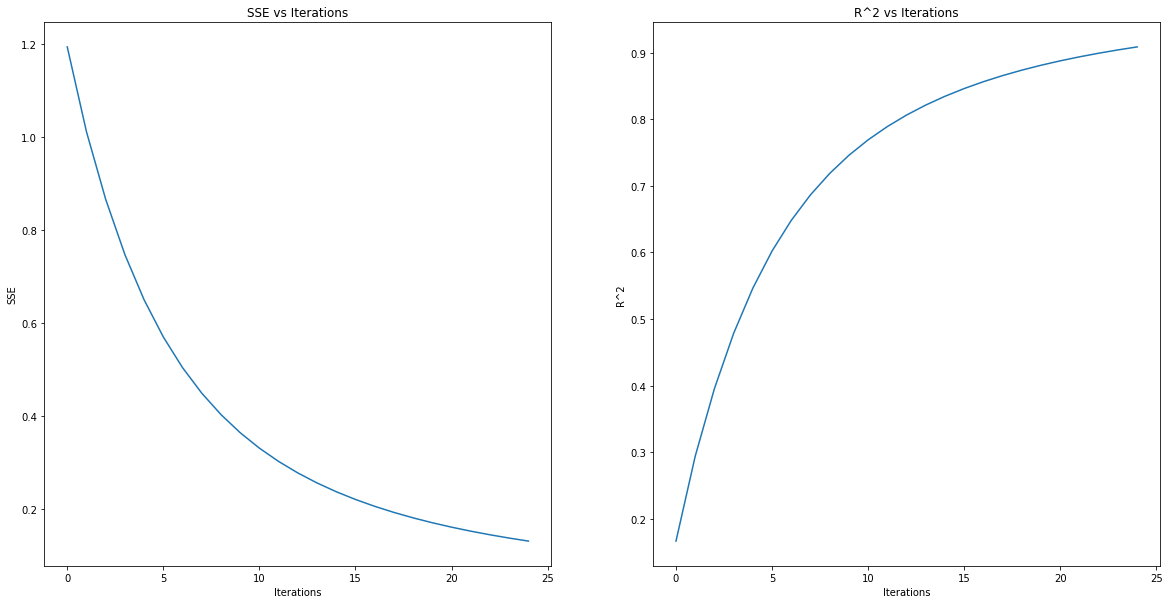

In [313]:
# Plotting our findings

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(x_list, sse_list)
plt.title('SSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(x_list, rsq_list)
plt.title("R^2 vs Iterations")
plt.xlabel('Iterations')
plt.ylabel('R^2')

plt.show()